In [6]:
%matplotlib inline


Gaussian HMM of stock data
--------------------------

This script shows how to use Gaussian HMM on stock price data from
Yahoo! finance. For more information on how to visualize stock prices
with matplotlib, please refer to ``date_demo1.py`` of matplotlib.



In [7]:
from __future__ import print_function

import datetime

import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
try:
    from matplotlib.finance import quotes_historical_yahoo_ochl
except ImportError:
    # For Matplotlib prior to 1.5.
    from matplotlib.finance import (
        quotes_historical_yahoo as quotes_historical_yahoo_ochl
    )

from hmmlearn.hmm import GaussianHMM


print(__doc__)

Automatically created module for IPython interactive environment


Get quotes from Yahoo! finance



In [11]:
import pandas as pd

In [48]:
#quotes_historical_yahoo_ochl("INTC", datetime.date(1995, 1, 1), datetime.date(2012, 1, 6))
quotes = pd.read_csv("./INTC.csv")
quotes_matrix = quotes.reset_index().as_matrix()
# Unpack quotes
dates = np.array([q[1] for q in quotes_matrix])
close_v = np.array([q[5] for q in quotes_matrix])
volume = np.array([q[7] for q in quotes_matrix])[1:]

# Take diff of close value. Note that this makes
# ``len(diff) = len(close_t) - 1``, therefore, other quantities also
# need to be shifted by 1.
diff = np.diff(close_v)
dates = dates[1:]
close_v = close_v[1:]

# Pack diff and volume for training.
X = np.column_stack([diff, volume])

In [49]:
quotes.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-01-03,3.976563,4.000975,3.937500,3.984375,2.669861,41721600
1,1995-01-04,4.000000,4.023438,3.953125,3.976563,2.664625,41865600
2,1995-01-05,3.984375,4.062500,3.976563,4.007813,2.685566,60480000
3,1995-01-06,4.007813,4.070313,4.000000,4.062500,2.722212,56316800
4,1995-01-09,4.054688,4.125000,4.054688,4.125000,2.764089,75056000


In [50]:
volume

array([41865600, 60480000, 56316800, ..., 35052800, 33089800, 42240200])

In [51]:
diff

array([-0.007812,  0.03125 ,  0.054687, ...,  0.35    ,  0.039999,
       -0.289999])

In [53]:
dates

array(['1995-01-04', '1995-01-05', '1995-01-06', ..., '2012-05-29',
       '2012-05-30', '2012-05-31'], dtype='|S10')

In [54]:
close_v

array([ 3.976563,  4.007813,  4.0625  , ..., 26.09    , 26.129999,
       25.84    ])

In [56]:
X

array([[-7.81200e-03,  4.18656e+07],
       [ 3.12500e-02,  6.04800e+07],
       [ 5.46870e-02,  5.63168e+07],
       ...,
       [ 3.50000e-01,  3.50528e+07],
       [ 3.99990e-02,  3.30898e+07],
       [-2.89999e-01,  4.22402e+07]])

Run Gaussian HMM



In [55]:
print("fitting to HMM and decoding ...", end="")

# Make an HMM instance and execute fit
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000).fit(X)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("done")

fitting to HMM and decoding ...

/Users/khanhdinh/.local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


done


Print trained parameters and plot



Transition matrix
[[8.70973458e-01 1.21346345e-01 7.68019353e-03 2.85471364e-09]
 [1.41084040e-01 7.54653117e-01 1.02865492e-01 1.39735073e-03]
 [7.42168115e-03 4.20014236e-01 5.72564083e-01 1.92120750e-41]
 [8.34961350e-04 1.36723478e-03 5.28529157e-16 9.97797804e-01]]

Means and vars of each hidden state
0th hidden state
mean =  [1.02658226e-02 4.95492075e+07]
var =  [9.27073753e-02 1.30053352e+14]

1th hidden state
mean =  [1.65469403e-02 7.44238939e+07]
var =  [1.84662864e-01 2.41957153e+14]

2th hidden state
mean =  [-2.68255610e-02  1.28517092e+08]
var =  [5.30206843e-01 2.61998654e+15]

3th hidden state
mean =  [-9.43881795e-03  5.20956356e+07]
var =  [2.17646883e+00 4.41635187e+14]



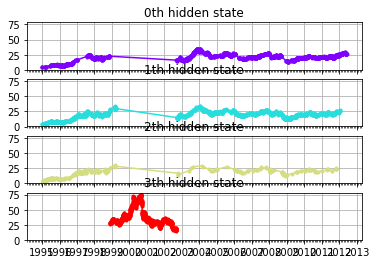

In [57]:
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], close_v[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()